# <font color=blue>Network Analysis in Python (Part 1)</font> 

From online social networks such as Facebook and Twitter to transportation networks such as bike sharing systems, networks are everywhere, and knowing how to analyze this type of data will open up a new world of possibilities for you as a Data Scientist. This course will equip you with the skills to analyze, visualize, and make sense of networks. You'll apply the concepts you learn to real-world network data using the powerful NetworkX library. With the knowledge gained in this course, you'll develop your network thinking skills and be able to start looking at your data with a fresh perspective!

## <font color=red>01 - Introduction to networks </font> 

 In this chapter, you'll be introduced to fundamental concepts in network analytics while becoming acquainted with a real-world Twitter network dataset that you will explore throughout the course. In addition, you'll learn about NetworkX, a library that allows you to manipulate, analyze, and model graph data. You'll learn about different types of graphs as well as how to rationally visualize them. 

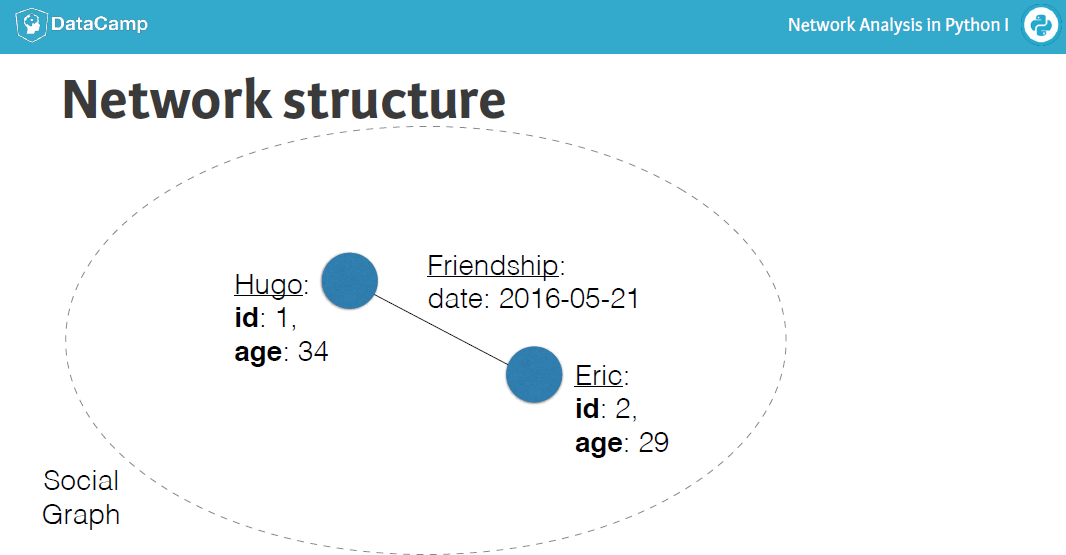

### Basics of NetworkX API, using Twitter network

To get you up and running with the NetworkX API, we will run through some basic functions that let you query a Twitter network that has been pre-loaded for you and is available in the IPython Shell as T. The Twitter network comes from KONECT, and shows a snapshot of a subset of Twitter users. It is an anonymized Twitter network with metadata.

You're now going to use the NetworkX API to explore some basic properties of the network, and are encouraged to experiment with the data in the IPython Shell.

Wait for the IPython shell to indicate that the graph that has been preloaded under the variable name T (representing a Twitter network), and then answer the following question:

What is the size of the graph T, the type of T.nodes(), and the data structure of the third element of the last entry of T.edges(data=True)? The len() and type() functions will be useful here. To access the last entry of T.edges(data=True), you can use T.edges(data=True)[-1].

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

### Basic drawing of a network using NetworkX

NetworkX provides some basic drawing functionality that works for small graphs. We have selected a subset of nodes from the graph for you to practice using NetworkX's drawing facilities. It has been pre-loaded as T_sub.

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Draw the graph to screen
nx.draw(T_sub)
plt.show()

### Queries on a graph

Now that you know some basic properties of the graph and have practiced using NetworkX's drawing facilities to visualize components of it, it's time to explore how you can query it for nodes and edges. Specifically, you're going to look for "nodes of interest" and "edges of interest". To achieve this, you'll make use of the .nodes() and .edges() methods that Eric went over in the video. The .nodes() method returns a list of nodes, while the .edges() method returns a list of tuples, in which each tuple shows the nodes that are present on that edge. Recall that passing in the keyword argument data=True in these methods retrieves the corresponding metadata associated with the nodes and edges as well.

You'll write list comprehensions to effectively build these queries in one line. For a refresher on list comprehensions, refer to Part 2 of DataCamp's Python Data Science Toolbox course. Here's the recipe for a list comprehension:

[ output expression for iterator variable in iterable if predicate expression ].

You have to fill in the _iterable_ and the _predicate expression_. Feel free to prototype your answer by exploring the graph in the IPython Shell before submitting your solution.

_Use a list comprehension to get a list of nodes from the graph T that have the 'occupation' label of 'scientist'.        
 Use a list comprehension to get a list of edges from the graph T that were formed for at least 6 years, i.e., from before 1 Jan 2010._

In [ ]:
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < date(2010, 1, 1)]

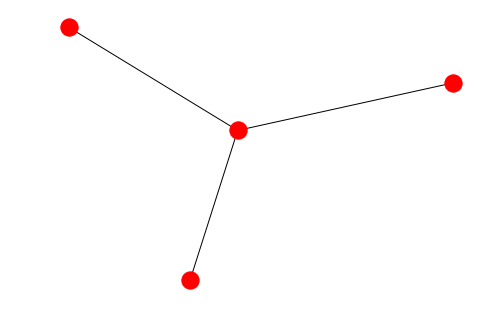

In [69]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from([1, 2, 3,4])
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)

G.node[1]['label'] = 'blue'
nx.draw(G)
plt.show()

In [14]:
T = nx.Graph()
T = nx.read_gpickle('ego-twitter.p')

In [ ]:
nx.draw(T)

### Specifying a weight on edges

Weights can be added to edges in a graph, typically indicating the "strength" of an edge. In NetworkX, the weight is indicated by the 'weight' key in the metadata dictionary.

Before attempting the exercise, use the IPython Shell to access the dictionary metadata of T and explore it, for instance by running the commands T.edge[1][10] and then T.edge[10][1]. Note how there's only one field, and now you're going to add another field, called 'weight'.

In [ ]:
# Set the weight of the edge
T.edge[1][10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u,v]:
    
        # Set the weight to 1.1
        T.edge[u][v]['weight'] = 1.1

### Checking whether there are self-loops in the graph

As Eric discussed, NetworkX also allows edges that begin and end on the same node; while this would be non-intuitive for a social network graph, it is useful to model data such as trip networks, in which individuals begin at one location and end in another.

It is useful to check for this before proceeding with further analyses, and NetworkX graphs provide a method for this purpose: .number_of_selfloops().

In this exercise as well as later ones, you'll find the assert statement useful. An assert-ions checks whether the statement placed after it evaluates to True, otherwise it will return an AssertionError.

To begin, use the .number_of_selfloops() method on T in the IPython Shell to get the number of edges that begin and end on the same node. A number of self-loops have been synthetically added to the graph. Your job in this exercise is to write a function that returns these edges.

In [ ]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []
    
    # Iterate over all the edges of G
    for u, v in G.edges():
    
    # Check if node u and node v are the same
        if u == v :
        
            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)
            
    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
assert T.number_of_selfloops() == len(find_selfloop_nodes(T))

### Visualizing using Matrix plots

It is time to try your first "fancy" graph visualization method: a matrix plot. To do this, nxviz provides a MatrixPlot object.

nxviz is a package for visualizing graphs in a rational fashion. Under the hood, the MatrixPlot utilizes nx.to_numpy_matrix(G), which returns the matrix form of the graph. Here, each node is one column and one row, and an edge between the two nodes is indicated by the value 1. In doing so, however, only the weight metadata is preserved; all other metadata is lost, as you'll verify using an assert statement.

A corresponding nx.from_numpy_matrix(A) allows one to quickly create a graph from a NumPy matrix. The default graph type is Graph(); if you want to make it a DiGraph(), that has to be specified using the create_using keyword argument, e.g. (nx.from_numpy_matrix(A, create_using=nx.DiGraph)).

One final note, matplotlib.pyplot and networkx have already been imported as plt and nx, respectively, and the graph T has been pre-loaded. For simplicity and speed, we have sub-sampled only 100 edges from the network.

In [ ]:
# Import nxviz
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(T)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

# Convert T to a matrix format: A
A = nx.to_numpy_matrix(T)

# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the `category` metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()

### Visualizing using Circos plots

Circos plots are a rational, non-cluttered way of visualizing graph data, in which nodes are ordered around the circumference in some fashion, and the edges are drawn within the circle that results, giving a beautiful as well as informative visualization about the structure of the network.

In this exercise, you'll continue getting practice with the nxviz API, this time with the CircosPlot object. matplotlib.pyplot has been imported for you as plt.

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import CircosPlot

# Create the CircosPlot object: c
c = CircosPlot(T)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()

### Visualizing using Arc plots

Following on what you've learned about the nxviz API, now try making an ArcPlot of the network. Two keyword arguments that you will try here are node_order='keyX' and node_color='keyX', in which you specify a key in the node metadata dictionary to color and order the nodes by.

matplotlib.pyplot has been imported for you as plt.

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(T)

# Draw a to the screen
a.draw()

# Display the plot
plt.show()

# Create the customized ArcPlot object: a2
a2 = ArcPlot(T, node_order='category', node_color='category')

# Draw a2 to the screen
a2.draw()

# Display the plot
plt.show()

## <font color=red>02 - Important nodes </font> 

 Here, you'll learn about ways of identifying nodes that are important in a network. In doing so, you'll be introduced to more advanced concepts in network analysis as well as learn the basics of path-finding algorithms. The chapter concludes with a deep dive into the Twitter network dataset which will reinforce the concepts you've learned, such as degree centrality and betweenness centrality. 

### Compute number of neighbors for each node

How do you evaluate whether a node is an important one or not? There are a few ways to do so, and here, you're going to look at one metric: the number of neighbors that a node has.

Every NetworkX graph G exposes a .neighbors(n) method that returns a list of nodes that are the neighbors of the node n. To begin, use this method in the IPython Shell on the Twitter network T to get the neighbors of of node 1. This will get you familiar with how the function works. Then, your job in this exercise is to write a function that returns all nodes that have m neighbors.

In [ ]:
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G,m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()
    
    # Iterate over all nodes in G
    for n in G.nodes():
    
        # Check if the number of neighbors of n matches m
        if len(G.neighbors(n)) == m:
        
            # Add the node n to the set
            nodes.add(n)
            
    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T,6)
print(six_nbrs)

### Compute degree distribution

The number of neighbors that a node has is called its "degree", and it's possible to compute the degree distribution across the entire graph. In this exercise, your job is to compute the degree distribution across T.

In [ ]:
# Compute the degree of every node: degrees
degrees = [len(T.neighbors(n)) for n in T.nodes()]

# Print the degrees
print(degrees)

### Degree centrality distribution

The degree of a node is the number of neighbors that it has. The degree centrality is the number of neighbors divided by all possible neighbors that it could have. Depending on whether self-loops are allowed, the set of possible neighbors a node could have could also include the node itself.

The nx.degree_centrality(G) function returns a dictionary, where the keys are the nodes and the values are their degree centrality values.

The degree distribution degrees you computed in the previous exercise using the list comprehension has been pre-loaded.

In [ ]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T)

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(degrees, list(deg_cent.values()))
plt.show()

### Shortest Path I

You can leverage what you know about finding neighbors to try finding paths in a network. One algorithm for path-finding between two nodes is the "breadth-first search" (BFS) algorithm. In a BFS algorithm, you start from a particular node and iteratively search through its neighbors and neighbors' neighbors until you find the destination node.

Pathfinding algorithms are important because they provide another way of assessing node importance; you'll see this in a later exercise.

In this set of 3 exercises, you're going to build up slowly to get to the final BFS algorithm. The problem has been broken into 3 parts that, if you complete in succession, will get you to a first pass implementation of the BFS algorithm.

In [ ]:
# Define path_exists()
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    
    # Initialize the queue of cells to visit with the first node: queue
    queue = [node1]
    
    # Iterate over the nodes in the queue
    for node in queue:
    
        # Get neighbors of the node
        neighbors = G.neighbors(node) 
        
        # Check to see if the destination node is in the set of neighbors
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

### Shortest Path II

Now that you've got the code for checking whether the destination node is present in neighbors, next up, you're going to extend the same function to write the code for the condition where the destination node is not present in the neighbors.

All the code you need to write is in the else condition; that is, if node2 is not in neighbors.

In [ ]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]
    
    for node in queue:  
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break
        
        else:
            # Add current node to visited nodes
            visited_nodes.add(node)
            
            # Add neighbors of current node that have not yet been visited
            queue.extend([n for n in neighbors if n not in visited_nodes])

### Shortest Path III

This is the final exercise of this trio! You're now going to complete the problem by writing the code that returns False if there's no path between two nodes.

In [ ]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]
    
    for node in queue:  
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])
        
        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

### NetworkX betweenness centrality on a social network

Betweenness centrality is a node importance metric that uses information about the shortest paths in a network. It is defined as the fraction of all possible shortest paths between any pair of nodes that pass through the node.

NetworkX provides the nx.betweenness_centrality(G) function for computing the betweenness centrality of every node in a graph, and it returns a dictionary where the keys are the nodes and the values are their betweenness centrality measures.

In [ ]:
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(T)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(T)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()), list(deg_cen.values()))

# Display the plot
plt.show()

### Deep dive - Twitter network

You're going to now take a deep dive into a Twitter network, which will help reinforce what you've learned earlier. First, you're going to find the nodes that can broadcast messages very efficiently to lots of people one degree of separation away.

NetworkX has been pre-imported for you as nx.

In [ ]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)
    
    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))
    
    nodes = set()
    
    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():
    
        # Check if the current value has the maximum degree centrality
        if v == max_dc:
        
            # Add the current node to the set of nodes
            nodes.add(k)
            
    return nodes
    
# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(T)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(T)[node] == max(nx.degree_centrality(T).values())

### Deep dive - Twitter network part II

Next, you're going to do an analogous deep dive on betweenness centrality! Just a few hints to help you along: remember that betweenness centrality is computed using nx.betweenness_centrality(G).

In [ ]:
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)
    
    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))
    
    nodes = set()
    
    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():
    
        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:
        
            # Add the current node to the set of nodes
            nodes.add(k)
            
    return nodes

# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(T)

# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(T)[node] == max(nx.betweenness_centrality(T).values())

## <font color=red>03 - Structures</font> 

 This chapter is all about finding interesting structures within network data. You'll learn about essential concepts such as cliques, communities, and subgraphs, which will leverage all of the skills you acquired in Chapter 2. By the end of this chapter, you'll be ready to apply the concepts you've learned to a real-world case study. 

### Identifying triangle relationships

Now that you've learned about cliques, it's time to try leveraging what you know to find structures in a network. Triangles are what you'll go for first. We may be interested in triangles because they're the simplest complex clique. Let's write a few functions; these exercises will bring you through the fundamental logic behind network algorithms.

In the Twitter network, each node has an 'occupation' label associated with it, in which the Twitter user's work occupation is divided into celebrity, politician and scientist. One potential application of triangle-finding algorithms is to find out whether users that have similar occupations are more likely to be in a clique with one another.

In [17]:
from itertools import combinations

# Define is_in_triangle() 
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not. 
    
    Returns a boolean.
    """
    in_triangle = False
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):
    
        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle

### Finding nodes involved in triangles

NetworkX provides an API for counting the number of triangles that every node is involved in: nx.triangles(G). It returns a dictionary of nodes as the keys and number of triangles as the values. Your job in this exercise is to modify the function defined earlier to extract all of the nodes involved in a triangle relationship with a given node.

In [ ]:
from itertools import combinations

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):
    
        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):
        
            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)
            
            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)
            
    return triangle_nodes
    
# Write the assertion statement. Use your function in an assert statement to check 
# that the number of nodes involved in a triangle relationship with node 1 of graph T is equal to 35.
assert len(nodes_in_triangle(T, 1)) == 35

### Finding open triangles

Let us now move on to finding open triangles! Recall that they form the basis of friend recommendation systems; if "A" knows "B" and "A" knows "C", then it's probable that "B" also knows "C".

In [ ]:
from itertools import combinations

# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):
    
        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):
        
            in_open_triangle = True
            
            break
            
    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in (T.nodes()):

    # Check if the current node is in an open triangle
    if node_in_open_triangle(T,n):
    
        # Increment num_open_triangles
        num_open_triangles += 1
        
print(num_open_triangles)

### Finding all maximal cliques of size "n"

Now that you've explored triangles (and open triangles), let's move on to the concept of maximal cliques. Maximal cliques are cliques that cannot be extended by adding an adjacent edge, and are a useful property of the graph when finding communities. NetworkX provides a function that allows you to identify the nodes involved in each maximal clique in a graph: nx.find_cliques(G). Play around with the function by using it on T in the IPython Shell, and then try answering the exercise.

In [ ]:
# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in list(nx.find_cliques(G)):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

# Check that there are 33 maximal cliques of size 3 in the graph T
assert len(maximal_cliques(T, 3))  == 33

### Subgraphs I

There may be times when you just want to analyze a subset of nodes in a network. To do so, you can copy them out into another graph object using G.subgraph(nodes), which returns a new graph object (of the same type as the original graph) that is comprised of the iterable of nodes that was passed in.

matplotlib.pyplot has been imported for you as plt.

In [ ]:
nodes_of_interest = [29, 38, 42]

# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []
    
    # Iterate over the nodes of interest
    for n in nodes_of_interest:
    
        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)
        
        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):
        
            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)
            
    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(T, nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(T_draw)
plt.show()

### Subgraphs II

In the previous exercise, we gave you a list of nodes whose neighbors we asked you to extract.

Let's try one more exercise in which you extract nodes that have a particular metadata property and their neighbors. This should hark back to what you've learned about using list comprehensions to find nodes. The exercise will also build your capacity to compose functions that you've already written before.

In [ ]:
# Extract the nodes of interest: nodes
nodes = [n for n, d in T.nodes(data=True) if d['occupation'] == 'celebrity']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = T.neighbors(n)
    
    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: T_sub
T_sub = T.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(T_sub)
plt.show()

## <font color=red>04 - Bringing it all together </font> 

 In this final chapter of the course, you'll consolidate everything you've learned by diving into an in-depth case study of GitHub collaborator network data. This is a great example of real-world social network data, and your newly acquired skills will be fully tested. By the end of this chapter, you'll have developed your very own recommendation system which suggests GitHub users who should collaborate together. Enjoy! 

In [25]:
G = nx.read_gpickle('github_users.p')

### Characterizing the network (I)

To start out, let's do some basic characterization of the network, by looking at the number of nodes and number of edges in a network. It has been pre-loaded as G and is available for exploration in the IPython Shell. Your job in this exercise is to identify how many nodes and edges are present in the network. You can use the functions len(G.nodes()) and len(G.edges()) to calculate the number of nodes and edges respectively.

### Characterizing the network (II)

Let's continue recalling what you've learned before about node importances, by plotting the degree distribution of a network. This is the distribution of node degrees computed across all nodes in a network.

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx 

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()

### Characterizing the network (III)

The last exercise was on degree centrality; this time round, let's recall betweenness centrality!

A small note: if executed correctly, this exercise may need about 5 seconds to execute.

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(G).values()))
plt.show()

### MatrixPlot

Let's now practice making some visualizations. The first one will be the MatrixPlot. In a MatrixPlot, the matrix is the representation of the edges.

In [ ]:
# Import necessary modules
from nxviz import MatrixPlot
import matplotlib.pyplot as plt

# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(graph=largest_ccs, node_grouping='grouping')

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

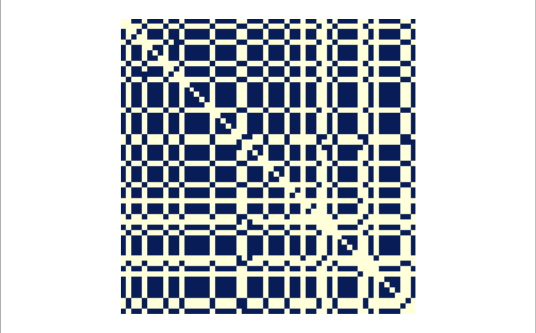

### ArcPlot

Next up, let's use the ArcPlot to visualize the network. You're going to practice sorting the nodes in the graph as well.

Note: this exercise may take about 4-7 seconds to execute if done correctly.;

In [ ]:
# Import necessary modules
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G,n)
    
# Create the ArcPlot object: a
a = ArcPlot(graph = G, node_order = 'degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

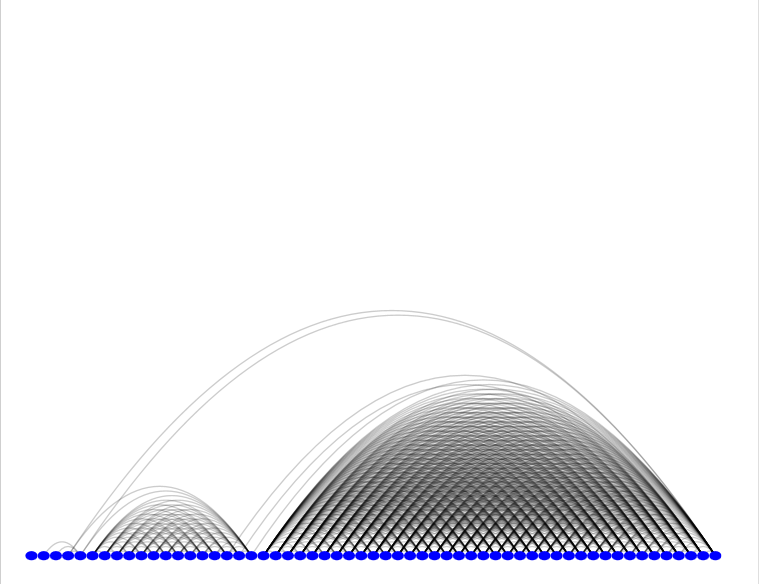

### CircosPlot

Finally, you're going to make a CircosPlot of the network!

In [ ]:
# Import necessary modules
from nxviz import CircosPlot
import matplotlib.pyplot as plt 
 
# Iterate over all the nodes, including the metadata
for n, d in G.node(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G,n)

# Create the CircosPlot object: c
c = CircosPlot(graph = G, node_order = 'degree', node_grouping='grouping', node_color='grouping')

# Draw the CircosPlot object to the screen
c.draw()
plt.show()

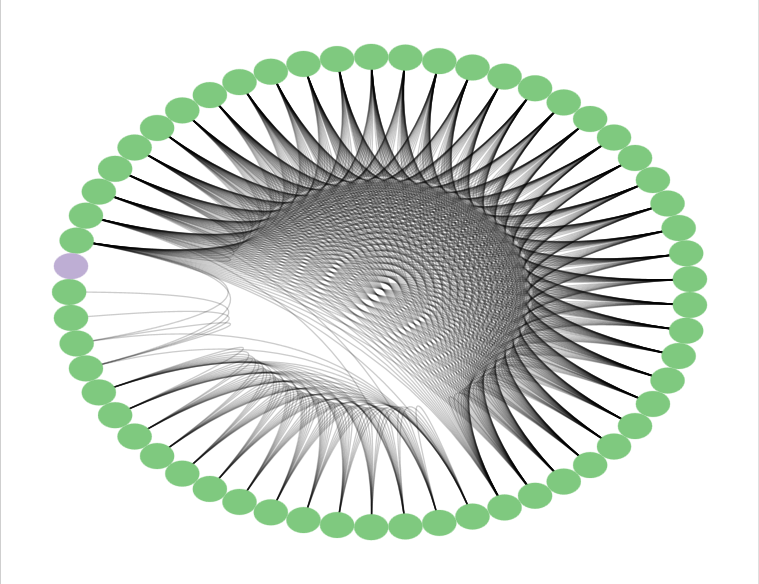

### Finding cliques (I)

You're now going to practice finding cliques in G. Recall that cliques are "groups of nodes that are fully connected to one another", while a maximal clique is a clique that cannot be extended by adding another node in the graph.

In [ ]:
# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(G)

# Count and print the number of maximal cliques in G
print(len(list(cliques)))

### Finding cliques (II)

Great work! Let's continue by finding a particular maximal clique, and then plotting that clique.

In [ ]:
# Import necessary modules
import networkx as nx
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

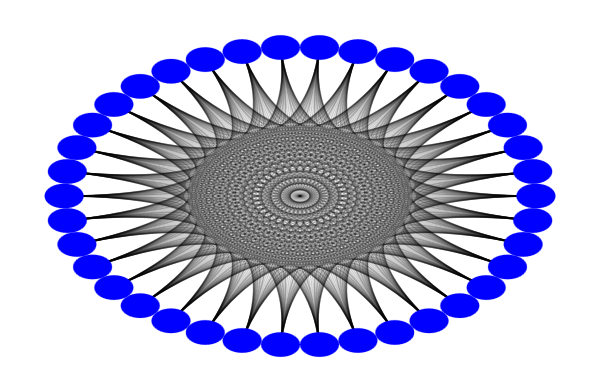

### Finding important collaborators

Almost there! You'll now look at important nodes once more. Here, you'll make use of the degree_centrality() and betweenness_centrality() functions in NetworkX to compute each of the respective centrality scores, and then use that information to find the "important nodes". In other words, your job in this exercise is to find the user(s) that have collaborated with the most number of users.

In [ ]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)

### Characterizing editing communities

You're now going to combine what you've learned about the BFS algorithm and concept of maximal cliques to visualize the network with an ArcPlot.

The largest maximal clique in the Github user collaboration network has been assigned to the subgraph G_lmc.

In [ ]:
# Import necessary modules
from nxviz import ArcPlot
import matplotlib.pyplot as plt
 
# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G.subgraph(largest_max_clique)

# Go out 1 degree of separation
for node in G_lmc.nodes():
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(G.neighbors(node)), G.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]
        
# Create the ArcPlot object: a
a = ArcPlot(G_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

### Recommending co-editors who have yet to edit together

Finally, you're going to leverage the concept of open triangles to recommend users on GitHub to collaborate!

In [ ]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):
        
            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)